In [8]:
import rosbag
from geometry_msgs.msg import Vector3
import rospy

bag = rosbag.Bag('/home/miguel/catkin_ws/src/crazyflie/crazyflie_controller/src/data/data_record.bag')

import matplotlib.pyplot as plt

position_optitrack = []
position_state_estimate = []
vel_optitrack = []
vel_state_estimate = []
position_gaussian_error = []

for topic, msg, t in bag.read_messages(topics=['position_Optitrack', 'position_estimate_topic', 'vel_Optitrack', 'vel_estimate_topic', 'position_gaussian_error']):
    
    if topic == 'position_Optitrack':
        position_optitrack.append((msg.x, msg.y, msg.z))

    if topic == 'position_estimate_topic':
        position_state_estimate.append((msg.x, msg.y, msg.z))

    if topic == 'vel_Optitrack':
        vel_optitrack.append((msg.x, msg.y, msg.z))

    if topic == 'vel_estimate_topic':
        vel_state_estimate.append((msg.x, msg.y, msg.z))

    if topic == 'position_gaussian_error':
        position_gaussian_error.append((msg.x, msg.y, msg.z))

# After processing, close the bag
bag.close()


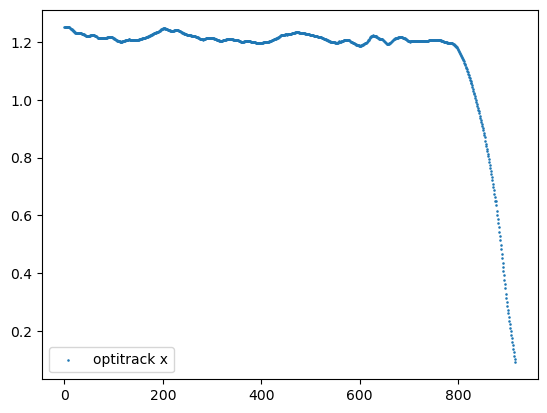

In [9]:
# Plotting example
plt.scatter(range(len(position_optitrack)), [x[2] for x in position_optitrack], label='optitrack x', s=0.7)
# plt.scatter(range(len(position_state_estimate)), [x[2] for x in position_state_estimate], label='kalman x', s=0.7)
# Add more plots as needed
plt.legend()
plt.show()

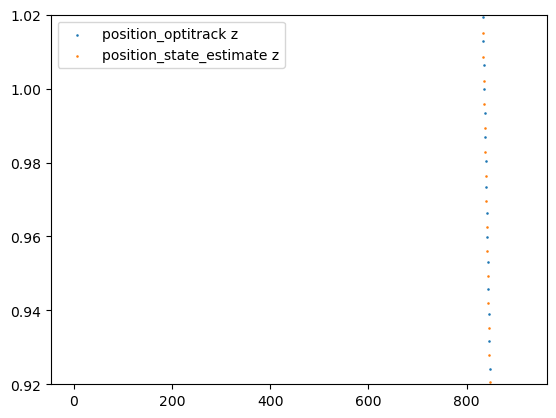

In [10]:
# Plotting example
plt.scatter(range(len(position_optitrack)), [x[2] for x in position_optitrack], label='position_optitrack z', s=0.7)
plt.scatter(range(len(position_state_estimate)), [x[2] for x in position_state_estimate], label='position_state_estimate z', s=0.7)
# plt.scatter(range(len(position_gaussian_error)), [x[2] for x in position_gaussian_error], label='position_gaussian_error z', s=0.7)
# Add more plots as needed
plt.ylim(0.92, 1.02)
plt.legend()
plt.show()

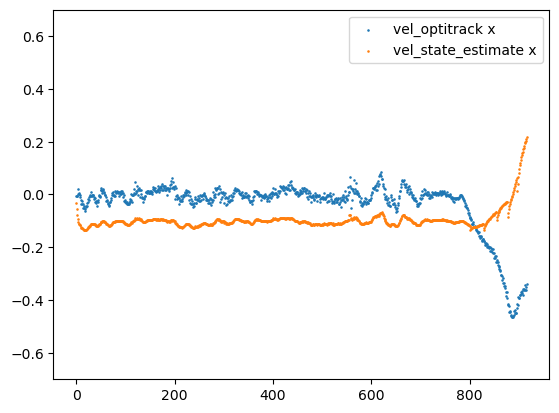

In [11]:
# Plotting example
plt.scatter(range(len(vel_optitrack)), [x[2] for x in vel_optitrack], label='vel_optitrack x', s=0.7)
plt.scatter(range(len(vel_state_estimate)), [x[2] for x in vel_state_estimate], label='vel_state_estimate x', s=0.7)
plt.ylim(-0.7, 0.7)
# Add more plots as needed
plt.legend()
plt.show()


In [13]:
import numpy as np
print(np.array(vel_state_estimate)[100:110, 2])
print(np.array(vel_optitrack)[100:110, 2])
np.array(0.01**2 * np.eye(3))


[-0.11254297 -0.11276434 -0.1132149  -0.11428853 -0.11505966 -0.11508542
 -0.11456661 -0.11457124 -0.11330469 -0.11053303]
[-0.03197158 -0.02772299 -0.02953791 -0.03548443 -0.03780142 -0.03585521
 -0.03285394 -0.03558698 -0.02873505 -0.01588788]


array([[0.0001, 0.    , 0.    ],
       [0.    , 0.0001, 0.    ],
       [0.    , 0.    , 0.0001]])